# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
%matplotlib inline

## Generate Cities List

In [2]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#url = "http://api.openweathermap.org/data/2.5/weather?"
#units = "imperial"
#query_url = f"{url}appid={api_key}"

#target_url = query_url + city.replace(" ", "+") + units
#response = requests.get(target_url)
#response_json = response.json()
#response_json

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"

query_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key   

city_data = []

print("Beginning Data Retrieval    ")
print("----------------------------")

#counters
record_num =1
set_num = 1

for i, city in enumerate(cities):
   #create groups of 50
    if (i% 50 == 0 and i >= 50):
        set_num += 1
        record_num = 0
        
    #url for the loop to run through
    city_url = query_url + "&q=" + city.replace(" ", "+")
    #print(city_url)
    
    print("Processing Record {} of Set {} | {}".format(record_num, set_num, city))
    
    #update record_num within the loop
    record_num += 1
    
    #request info on each city
    try:
        city_response = requests.get(city_url).json()
        
        #within this response find the data necessary for DataFrame
        city_lat = city_response["coord"]["lat"]
        city_lon = city_response["coord"]["lon"]
        city_max_temp = city_response["main"]["temp_max"]
        city_humidity = city_response["main"]["humidity"]
        city_cloudiness = city_response["clouds"]["all"]
        city_windspeed = city_response["wind"]["speed"]
        city_country = city_response["sys"]["country"]
        city_date = city_response["dt"]
        
        #append the city info to empty list
        city_data.append({"City": city,
                         "Lat": city_lat, 
                         "Lng": city_lon,
                         "Max Temp": city_max_temp, 
                         "Humidity": city_humidity, 
                         "Cloudiness": city_cloudiness, 
                         "Wind Speed": city_windspeed,
                         "Country": city_country, 
                         "Date": city_date})
    #if no city info is found, skip
    except:
        print("City not found. Skipping ...")
        pass
    
print("---------------------")
print("Data Retrieval Complete")
print("---------------------")    




Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | pevek
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping ...
Processing Record 3 of Set 1 | hobyo
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | black river
Processing Record 6 of Set 1 | luderitz
Processing Record 7 of Set 1 | mecca
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | faanui
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | dubbo
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | sao joao da barra
Processing Record 14 of Set 1 | nizhneyansk
City not found. Skipping ...
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | san patricio
Processing Record 17 of Set 1 | kyabram
Processing Record 18 of Set 1 | barentu
Processing Record 19 of Set 1 | thai binh
Processing Record 20 of Set 1 | petauke
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1

Processing Record 38 of Set 4 | necochea
Processing Record 39 of Set 4 | karratha
Processing Record 40 of Set 4 | tumannyy
City not found. Skipping ...
Processing Record 41 of Set 4 | lufilufi
Processing Record 42 of Set 4 | burnie
Processing Record 43 of Set 4 | carbonia
Processing Record 44 of Set 4 | codrington
Processing Record 45 of Set 4 | wladyslawowo
Processing Record 46 of Set 4 | sumenep
Processing Record 47 of Set 4 | chuy
Processing Record 48 of Set 4 | svetlogorsk
Processing Record 49 of Set 4 | asfi
Processing Record 0 of Set 5 | lazaro cardenas
Processing Record 1 of Set 5 | tungkang
City not found. Skipping ...
Processing Record 2 of Set 5 | mahebourg
Processing Record 3 of Set 5 | nyrob
Processing Record 4 of Set 5 | benin
Processing Record 5 of Set 5 | covington
Processing Record 6 of Set 5 | lethem
Processing Record 7 of Set 5 | usolye
Processing Record 8 of Set 5 | haibowan
City not found. Skipping ...
Processing Record 9 of Set 5 | portland
Processing Record 10 of 

Processing Record 29 of Set 8 | kupang
Processing Record 30 of Set 8 | sentyabrskiy
City not found. Skipping ...
Processing Record 31 of Set 8 | xining
Processing Record 32 of Set 8 | san rafael
Processing Record 33 of Set 8 | jever
Processing Record 34 of Set 8 | havre-saint-pierre
Processing Record 35 of Set 8 | brae
Processing Record 36 of Set 8 | nanortalik
Processing Record 37 of Set 8 | derzhavinsk
Processing Record 38 of Set 8 | rudnogorsk
Processing Record 39 of Set 8 | tottori
Processing Record 40 of Set 8 | itarema
Processing Record 41 of Set 8 | high rock
Processing Record 42 of Set 8 | sarvar
Processing Record 43 of Set 8 | kandi
Processing Record 44 of Set 8 | parana
Processing Record 45 of Set 8 | pacifica
Processing Record 46 of Set 8 | simi
Processing Record 47 of Set 8 | tocantinopolis
City not found. Skipping ...
Processing Record 48 of Set 8 | winnemucca
Processing Record 49 of Set 8 | hambantota
Processing Record 0 of Set 9 | provost
Processing Record 1 of Set 9 | c

Processing Record 21 of Set 12 | maraba
Processing Record 22 of Set 12 | divnogorsk
Processing Record 23 of Set 12 | balabac
Processing Record 24 of Set 12 | teodoro sampaio
Processing Record 25 of Set 12 | nabire
Processing Record 26 of Set 12 | yakovlevka
Processing Record 27 of Set 12 | doha
Processing Record 28 of Set 12 | larap
Processing Record 29 of Set 12 | shelburne
Processing Record 30 of Set 12 | forio
Processing Record 31 of Set 12 | siedlce
Processing Record 32 of Set 12 | atbasar
Processing Record 33 of Set 12 | sinnamary
Processing Record 34 of Set 12 | yangambi
Processing Record 35 of Set 12 | wexford
Processing Record 36 of Set 12 | kyren
Processing Record 37 of Set 12 | xadani
City not found. Skipping ...
Processing Record 38 of Set 12 | daloa
Processing Record 39 of Set 12 | leningradskiy
Processing Record 40 of Set 12 | mrirt
City not found. Skipping ...
Processing Record 41 of Set 12 | mogadishu
Processing Record 42 of Set 12 | calbuco
Processing Record 43 of Set 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#city_dict = {'City': city, 'Lat': [lat], 'Lng': lon, 'Max Temp': max_temp, 'Humidity': humidity, 'Cloudiness': cloudiness, 'Wind Speed': windspeed, 'Country': country, 'Date': date}
city_df = pd.DataFrame(city_data)
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pevek,69.7008,170.3133,17.89,96,93,8.70,RU,1618690669
1,hobyo,5.3505,48.5268,83.52,67,6,14.14,SO,1618690669
2,port elizabeth,-33.9180,25.5701,57.20,94,40,2.30,ZA,1618690669
3,black river,18.0264,-77.8487,84.20,74,75,20.71,JM,1618690670
4,luderitz,-26.6481,15.1594,77.11,38,30,1.16,NA,1618690670
...,...,...,...,...,...,...,...,...,...
576,severnyy,50.6770,36.5532,42.80,81,0,6.71,RU,1618690879
577,taltal,-25.4000,-70.4833,67.12,71,25,6.22,CL,1618690880
578,pauini,-7.7136,-66.9764,80.15,89,87,2.86,BR,1618690880
579,davila,18.4726,120.5763,79.61,75,80,23.04,PH,1618690881


In [7]:
city_df.to_csv("output.csv", index=False)

In [8]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,5.810000e+02
mean,20.137552,14.530320,60.926162,68.166954,54.919105,8.155284,1.618691e+09
std,32.448183,88.792202,20.855161,21.978783,39.559758,5.394518,9.120797e+01
min,-54.800000,-179.166700,-22.590000,4.000000,0.000000,0.650000,1.618690e+09
25%,-6.316400,-62.996700,48.000000,56.000000,16.000000,4.270000,1.618691e+09
50%,24.344800,19.224400,64.400000,73.000000,66.000000,6.910000,1.618691e+09
75%,47.599900,91.390300,78.130000,85.000000,97.000000,11.160000,1.618691e+09
max,78.218600,179.316700,102.700000,100.000000,100.000000,32.770000,1.618691e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.

idx = city_df.index[city_df['Humidity']]
idx

Int64Index([ 96,  67,  94,  74,  38,  37,  86,  73,  70, 100,
            ...
             36,  87,  43,  57,  47,  81,  71,  89,  75,  94],
           dtype='int64', length=581)

In [10]:

new_city_df = city_df.drop(city_df.loc[city_df['Humidity'] > 100].index)
new_city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,5.810000e+02
mean,20.137552,14.530320,60.926162,68.166954,54.919105,8.155284,1.618691e+09
std,32.448183,88.792202,20.855161,21.978783,39.559758,5.394518,9.120797e+01
min,-54.800000,-179.166700,-22.590000,4.000000,0.000000,0.650000,1.618690e+09
25%,-6.316400,-62.996700,48.000000,56.000000,16.000000,4.270000,1.618691e+09
50%,24.344800,19.224400,64.400000,73.000000,66.000000,6.910000,1.618691e+09
75%,47.599900,91.390300,78.130000,85.000000,97.000000,11.160000,1.618691e+09
max,78.218600,179.316700,102.700000,100.000000,100.000000,32.770000,1.618691e+09


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_df.drop(city_df.loc[city_df['Humidity'] > 100].index, inplace=False)
clean_city_data.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pevek,69.7008,170.3133,17.89,96,93,8.70,RU,1618690669
1,hobyo,5.3505,48.5268,83.52,67,6,14.14,SO,1618690669
2,port elizabeth,-33.9180,25.5701,57.20,94,40,2.30,ZA,1618690669
3,black river,18.0264,-77.8487,84.20,74,75,20.71,JM,1618690670
4,luderitz,-26.6481,15.1594,77.11,38,30,1.16,NA,1618690670


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

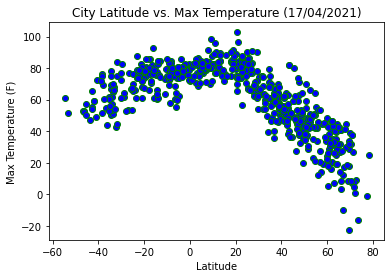

In [12]:
x_axis = clean_city_data['Lat']
temp = clean_city_data['Max Temp']
                           
plt.scatter(x_axis, temp, marker="o", color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude vs. Max Temperature (17/04/2021)")
plt.savefig("images/maxtemp.png")
plt.show()


## Latitude vs. Humidity Plot

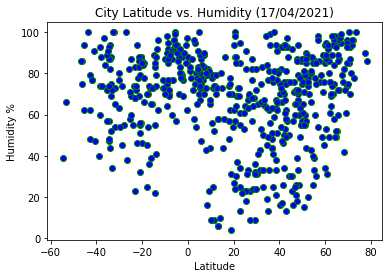

In [13]:
x_axis = clean_city_data['Lat']
y_axis = clean_city_data['Humidity']
plt.scatter(x_axis, y_axis, marker="o", color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title("City Latitude vs. Humidity (17/04/2021)")
plt.savefig("images/humidity.png")
plt.show()


## Latitude vs. Cloudiness Plot

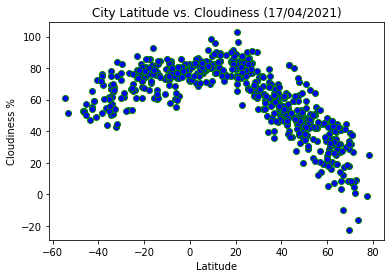

In [14]:
x_axis = clean_city_data['Lat']
clouds = clean_city_data['Max Temp']
plt.scatter(x_axis, clouds, marker="o", color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title("City Latitude vs. Cloudiness (17/04/2021)")
plt.savefig("images/cloudiness.png")
plt.show()


## Latitude vs. Wind Speed Plot

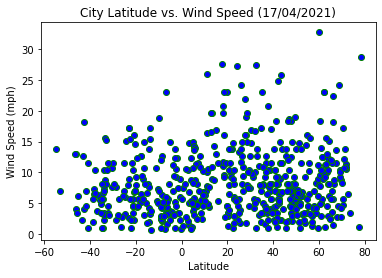

In [15]:
x_axis = clean_city_data['Lat']
speed = clean_city_data['Wind Speed']
plt.scatter(x_axis, speed, marker="o", color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed (17/04/2021)")
plt.savefig("images/windspeed.png")
plt.show()


# # Linear Regression

In [16]:
#determine the north and south hemisphere to pull data from
north_hemisphere = clean_city_data.loc[clean_city_data['Lat'] >= 0]
#north_hemisphere
south_hemisphere = clean_city_data.loc[clean_city_data['Lat'] < 0]
#south_hemisphere

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

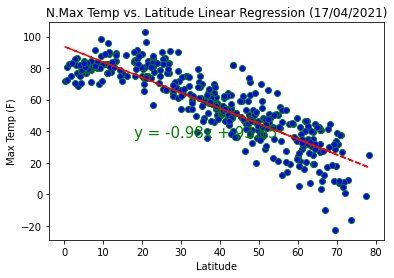

The r-squared value is 0.7520131201257938


In [17]:
x_axis = north_hemisphere['Lat']
y_axis = north_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("N.Max Temp vs. Latitude Linear Regression (17/04/2021)")
plt.plot(x_axis,regress_values,"r--")
plt.annotate(line_eq,(18,36),fontsize=15,color="green")
plt.savefig("images/n_maxtemp.png")
plt.show()
print(f"The r-squared value is {rvalue**2}")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

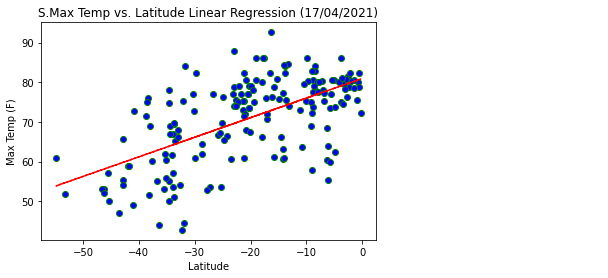

The r-squared value is 0.372917114158895


In [18]:
x_axis = south_hemisphere['Lat']
y_axis = south_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("S.Max Temp vs. Latitude Linear Regression (17/04/2021)")
plt.plot(x_axis,regress_values,"r--")
plt.annotate(line_eq,(18,36),fontsize=15,color="green")
plt.savefig("images/s_maxtemp.png")
plt.show()
print(f"The r-squared value is {rvalue**2}")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

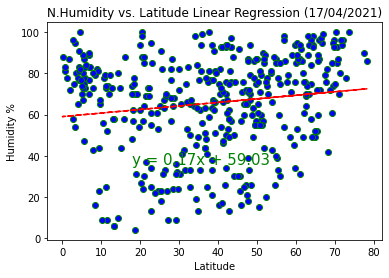

The r-squared value is 0.02226972964750706


In [19]:
x_axis = north_hemisphere['Lat']
y_axis = north_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title("N.Humidity vs. Latitude Linear Regression (17/04/2021)")
plt.plot(x_axis,regress_values,"r--")
plt.annotate(line_eq,(18,36),fontsize=15,color="green")
plt.savefig("images/n_humidity.png")
plt.show()
print(f"The r-squared value is {rvalue**2}")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

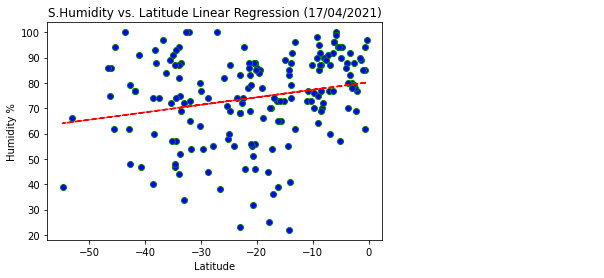

The r-squared value is 0.04994656301508511


In [20]:
x_axis = south_hemisphere['Lat']
y_axis = south_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title("S.Humidity vs. Latitude Linear Regression (17/04/2021)")
plt.plot(x_axis,regress_values,"r--")
plt.annotate(line_eq,(18,36),fontsize=15,color="green")
plt.savefig("images/s_humidity.png")
plt.show()
print(f"The r-squared value is {rvalue**2}")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

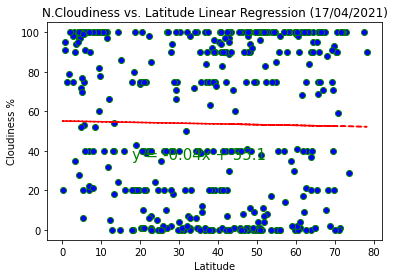

The r-squared value is 0.0003372402028797955


In [27]:
x_axis = north_hemisphere['Lat']
y_axis = north_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title("N.Cloudiness vs. Latitude Linear Regression (17/04/2021)")
plt.plot(x_axis,regress_values,"r--")
plt.annotate(line_eq,(18,36),fontsize=15,color="green")
plt.savefig("images/n_cloudines.png")
plt.show()
print(f"The r-squared value is {rvalue**2}")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

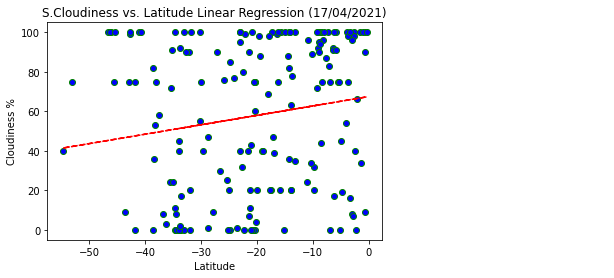

The r-squared value is 0.0270530744152668


In [28]:
x_axis = south_hemisphere['Lat']
y_axis = south_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title("S.Cloudiness vs. Latitude Linear Regression (17/04/2021)")
plt.plot(x_axis,regress_values,"r--")
plt.annotate(line_eq,(18,36),fontsize=15,color="green")
plt.savefig("images/s_cloudiness.png")
plt.show()
print(f"The r-squared value is {rvalue**2}")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

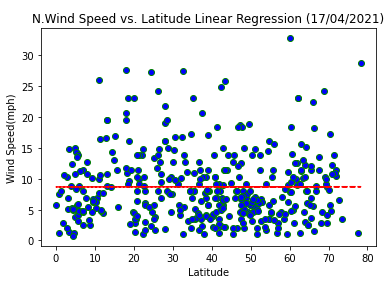

The r-squared value is 2.0177542347953912e-06


In [29]:
x_axis = north_hemisphere['Lat']
y_axis = north_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title("N.Wind Speed vs. Latitude Linear Regression (17/04/2021)")
plt.plot(x_axis,regress_values,"r--")
plt.annotate(line_eq,(18,36),fontsize=15,color="green")
plt.savefig("images/n_windspeed.png")
plt.show()
print(f"The r-squared value is {rvalue**2}")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

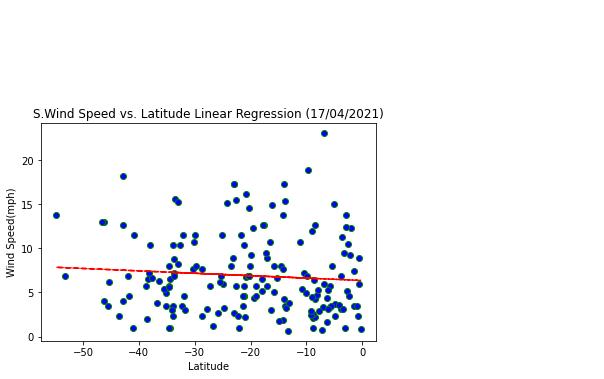

The r-squared value is 0.006584993638013569


In [30]:
x_axis = south_hemisphere['Lat']
y_axis = south_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title("S.Wind Speed vs. Latitude Linear Regression (17/04/2021)")
plt.plot(x_axis,regress_values,"r--")
plt.annotate(line_eq,(18,36),fontsize=15,color="green")
plt.savefig("images/s_windspeed.png")
plt.show()
print(f"The r-squared value is {rvalue**2}")
